In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
columns = ["Reference_Date_Time", "Reference_Disk_Usage"]
df_kafka = pd.read_csv("kafka_result_wo_compression.csv", usecols=columns)

In [3]:
df_kafka.set_index('Reference_Date_Time', inplace= True)
df_kafka.index = df_kafka.index.astype(int)

In [12]:
col = ["Revised Date Time","Disk_usage_With_compression","Reference_Disk_Usage_wo_compression"]
df_kafka_com = pd.read_csv("kafka_result_with_compression.csv", usecols=col)
df_kafka_com
df_kafka_com["Reference_Disk_Usage_wo_compression"] = df_kafka_com["Reference_Disk_Usage_wo_compression"].fillna(0)
#df_kafka_com.set_index('Revised Date Time', inplace= True)
#df_kafka_com.index = df_kafka.index.astype(int)

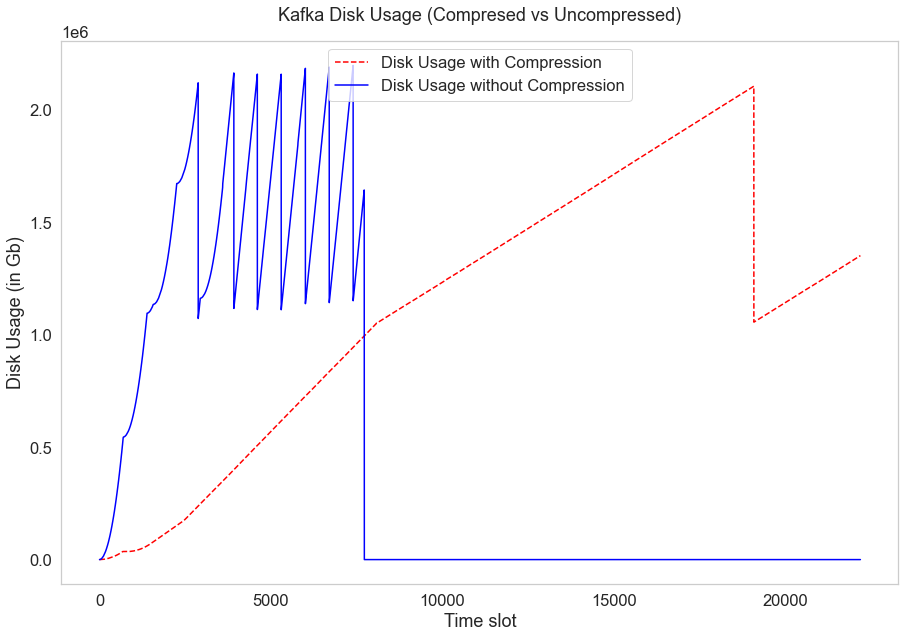

In [15]:
fig1 = plt.figure(figsize=(15, 10))
ax = fig1.add_subplot(1, 1, 1)
sns.set(font_scale = 1.5)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.lineplot(data=df_kafka_com["Disk_usage_With_compression"], color = "red", linestyle ="--")
sns.lineplot(data=df_kafka_com["Reference_Disk_Usage_wo_compression"], color = "blue")
ax.set(xlabel='Time slot', ylabel='Disk Usage (in Gb)')
plt.legend(["Disk Usage with Compression", "Disk Usage without Compression"])
plt.title("Kafka Disk Usage (Compresed vs Uncompressed)", pad =  20)
plt.savefig(r"C:\Users\ishri\Documents\Anumol\Kafka_uncompressed_comp.png", dpi = 300)
plt.savefig(r"C:\Users\ishri\Documents\Anumol\Kafka_uncompressed_comp.pdf", dpi = 300)

In [2]:
df_cassandra = pd.read_excel("Comparison_bw_with_wo_compressed.xlsx")

In [19]:
df_cassandra['disk_compressed_gb'] = df_cassandra['Disk_Usage_Compression'] / 1000
df_cassandra['disk_uncompressed_gb'] = df_cassandra['Disk_Usage'] / 1000

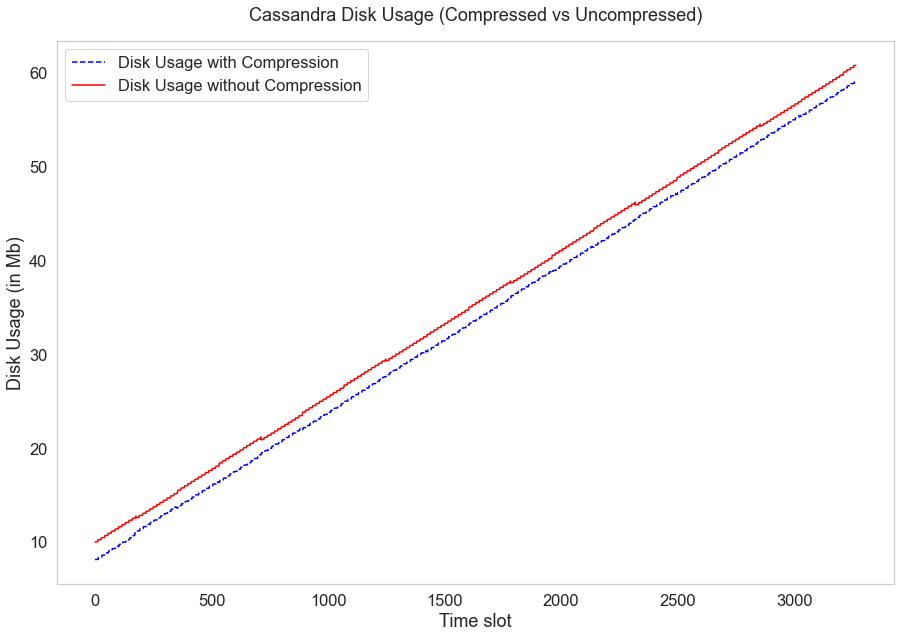

In [21]:
fig2 = plt.figure(figsize=(15, 10))
ax = fig2.add_subplot(1, 1, 1)
sns.set(font_scale = 1.5)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.lineplot(data=df_cassandra["disk_compressed_gb"], color = "blue", linestyle ="--", ax = ax)
sns.lineplot(data=df_cassandra["disk_uncompressed_gb"], color = "red", linestyle ="-", ax = ax)
ax.set(xlabel='Time slot', ylabel='Disk Usage (in Mb)')
plt.legend(["Disk Usage with Compression", "Disk Usage without Compression"])
plt.title("Cassandra Disk Usage (Compressed vs Uncompressed)", pad =  20)
plt.savefig(r"C:\Users\ishri\Documents\Anumol\Cass_diskusage.png", dpi = 300)
plt.savefig(r"C:\Users\ishri\Documents\Anumol\Cass_diskusage.pdf", dpi = 300)

In [14]:
df_new_data = pd.read_csv("results_wo_compression_round_3.csv")
#df_new_data['Ref_date_time'] = df_new_data_kafka['Ref_Date_Time']
#df_new_data.set_index('Ref_date_time', inplace= True)
#df_new_data.head()

In [3]:
df_new_data_kafka = pd.read_csv("results_with_zstd.csv")
df_new_data_kafka.set_index('Ref_Date_Time', inplace= True)
df_new_data_kafka.head()

,Date_time,CPU,Memory_Bytes,Disk_Usage,Unnamed: 4
Ref_Date_Time,,,,,
0,1629165464,1.876912e+10,452014080,28,NaN
1,1629165465,2.072142e+10,570572800,52,NaN
2,1629165466,2.244398e+10,495759360,52,NaN
4,1629165468,2.392474e+10,429137920,84,NaN
5,1629165469,2.575778e+10,530313216,84,NaN


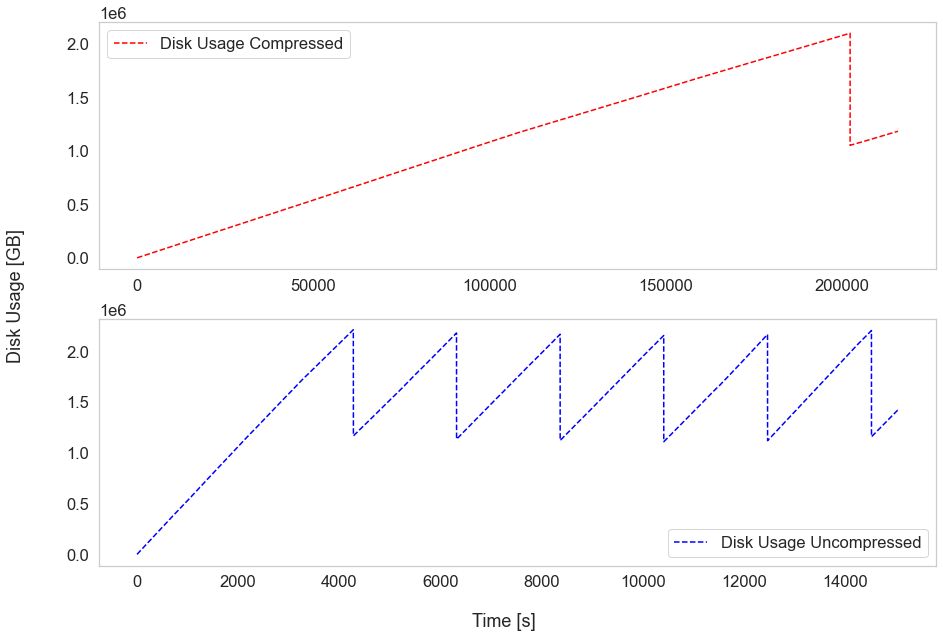

In [18]:
fig3, ax = plt.subplots(2, figsize=(15,10))
#fig3 = plt.figure(figsize=(15, 10))
#ax = fig3.add_subplot(1, 1, 1)
sns.set(font_scale = 1.5)
sns.set_style("whitegrid", {'axes.grid' : False})
#sns.lineplot(data=df_new_data["Disk_Usage"], color = "blue", linestyle ="--", ax = ax)
sns.lineplot(data=df_new_data_kafka["Disk_Usage"], color = "red", linestyle ="--", ax = ax[0])
sns.lineplot(data=df_new_data["Disk_Usage"], color = "blue", linestyle ="--", ax = ax[1])

ax[0].set(xlabel = "", ylabel = "")
ax[1].set(xlabel = "", ylabel = "")

fig3.text(0.5, 0.04, 'Time [s]', ha='center')
fig3.text(0.04, 0.5, 'Disk Usage [GB]', va='center', rotation='vertical')
#ax[0].set_title("Kafka Disk Usage (Compressed vs Uncompressed) ")
ax[1].legend(["Disk Usage Uncompressed"])
ax[0].legend(["Disk Usage Compressed"])
#plt.title("Cassandra Disk Usage (Compressed vs Uncompressed)", pad =  20)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\benchmarking_plots\Kafka_diskusage_comVsUncom.png", dpi = 300)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\benchmarking_plots\Kafka_diskusage_comVsUncom.pdf", dpi = 300)

In [8]:
df_cass_old = pd.read_csv("results_with_compression.csv")
df_cass_old.head()
#df_cass_new.set_index('Ref_date_time', inplace= True)

,Date_time,CPU,Memory_Bytes,Disk_Usage,Unnamed: 4,Ref_date_time
0,1629246452,6.893950e+12,2.397925e+09,2840.0,NaN,0.0
1,1629246453,6.894280e+12,2.398061e+09,2844.0,NaN,1.0
2,1629246454,6.894520e+12,2.398843e+09,2852.0,NaN,2.0
3,1629246455,6.894660e+12,2.398847e+09,2856.0,NaN,3.0
4,1629246456,6.894800e+12,2.399093e+09,2860.0,NaN,4.0


In [9]:
df_cass_uncom_new = pd.read_csv("results_cassandra_3_uncompressed.csv")
df_cass_uncom_new

,Date_time,CPU,Memory_Bytes,Disk_Usage,Unnamed: 4,Date_and_time
0,1629387119,8.299329e+10,8824930304,1184,NaN,0
1,1629387121,8.320560e+10,8817938432,1188,NaN,2
2,1629387122,8.486784e+10,8891224064,1192,NaN,3
3,1629387123,8.553843e+10,8818343936,1196,NaN,4
4,1629387124,8.572453e+10,8818466816,1200,NaN,5
...,...,...,...,...,...,...
27638,1629419799,1.200000e+13,8998453248,144680,NaN,32680
27639,1629419800,1.200000e+13,8997965824,144684,NaN,32681
27640,1629419801,1.200000e+13,9006030848,146340,NaN,32682
27641,1629419802,1.200000e+13,9010176000,155356,NaN,32683


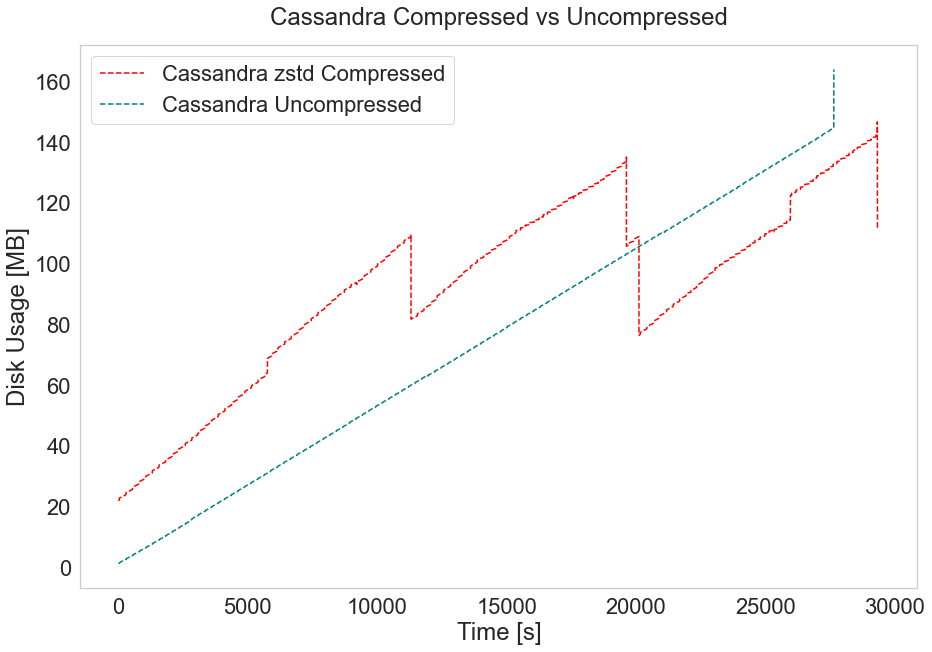

In [13]:
fig3 = plt.figure(figsize=(15, 10))
ax = fig3.add_subplot(1, 1, 1)
sns.set(font_scale = 2)
sns.set_style("whitegrid", {'axes.grid' : False})
#sns.lineplot(data=df_cass_old["Disk_Usage"], color = "blue", linestyle ="--", ax = ax)
sns.lineplot(data=df_cass_new["Disk_Usage"]/1000, color = "red", linestyle ="--", ax = ax)
#sns.lineplot(data=df_cass_uncom["Disk_Usage"], color = "orange", linestyle ="--", ax = ax)
sns.lineplot(data=df_cass_uncom_new["Disk_Usage"]/1000, color = "teal", linestyle ="--", ax = ax)
ax.set(xlabel='Time [s]', ylabel='Disk Usage [MB]')
plt.legend(["Cassandra zstd Compressed", "Cassandra Uncompressed"])
plt.title("Cassandra Compressed vs Uncompressed", pad =  20)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\benchmarking_plots\cassandra_diskusage_round3.png", dpi = 300)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\benchmarking_plots\cassandra_diskusage_round3.pdf", dpi = 300)

In [11]:
df_cass_new = pd.read_csv("results_zstd_compress_level_default.csv")
df_cass_new.head()

,Date_time,CPU,Memory_Bytes,Disk_Usage,Unnamed: 4,Ref_Date_time
0,1629279570,1.750000e+13,2494689280,21896,NaN,0
1,1629279571,1.750000e+13,2438774784,21900,NaN,1
2,1629279572,1.750000e+13,2511945728,21904,NaN,2
3,1629279573,1.750000e+13,2438729728,21908,NaN,3
4,1629279574,1.750000e+13,2438975488,21912,NaN,4


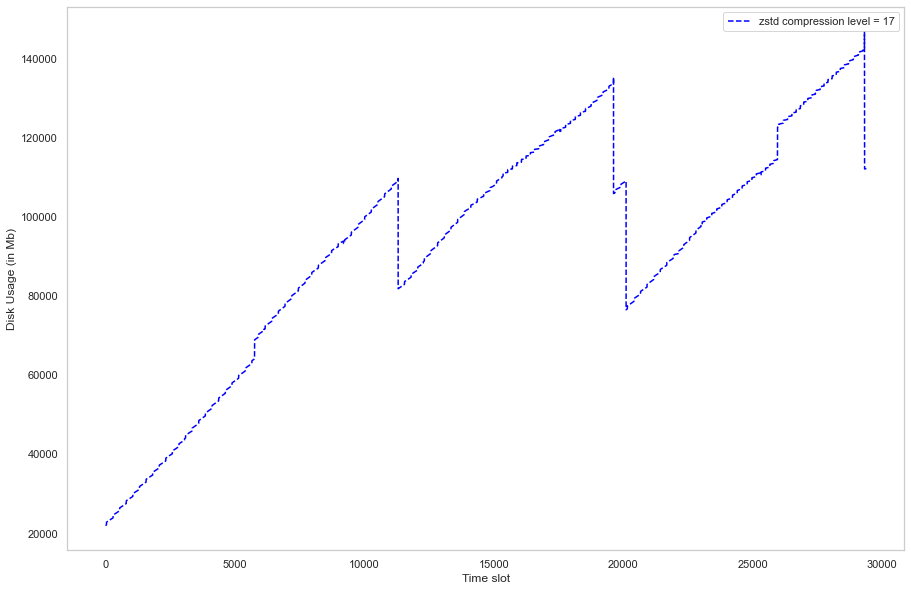

In [6]:
fig3 = plt.figure(figsize=(15, 10))
ax = fig3.add_subplot(1, 1, 1)
sns.set(font_scale = 1.0)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.lineplot(data=df_cass_new["Disk_Usage"], color = "blue", linestyle ="--", ax = ax)
ax.set(xlabel='Time slot', ylabel='Disk Usage (in Mb)')
plt.legend(["zstd compression level = 17"])

In [5]:
df_cass_uncom = pd.read_csv("results_uncompressed.csv")
df_cass_uncom.head()

,Date_time,CPU,Memory_Bytes,Disk_Usage
0,1629327234,1.255003e+11,2.379215e+09,1484.0
1,1629327235,1.261220e+11,2.409923e+09,1484.0
2,1629327237,1.287966e+11,2.381840e+09,1644.0
3,1629327238,1.290479e+11,2.382180e+09,1644.0
4,1629327239,1.291792e+11,2.382320e+09,1644.0


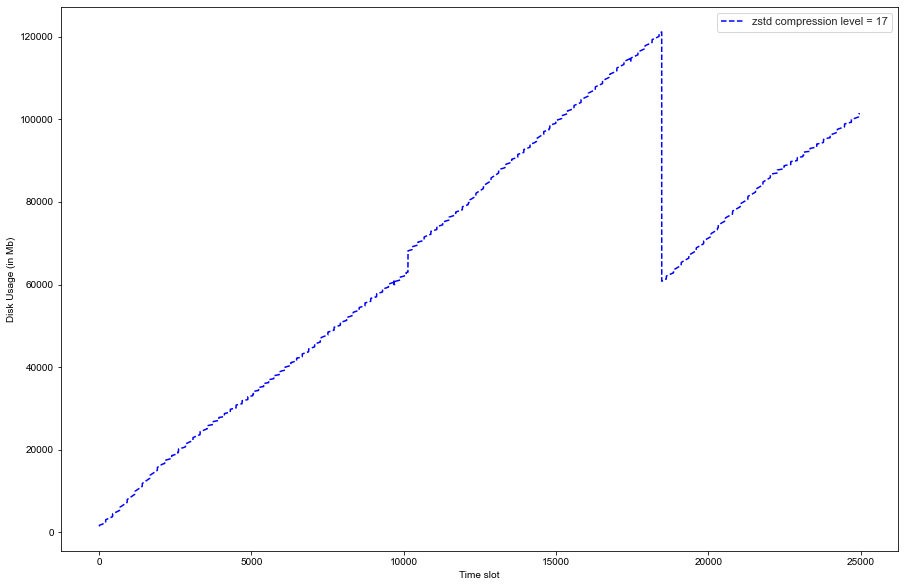

In [3]:
fig3 = plt.figure(figsize=(15, 10))
ax = fig3.add_subplot(1, 1, 1)
sns.set(font_scale = 1.0)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.lineplot(data=df_cass_uncom["Disk_Usage"], color = "blue", linestyle ="--", ax = ax)
ax.set(xlabel='Time slot', ylabel='Disk Usage (in Mb)')
plt.legend(["zstd compression level = 17"])

In [25]:
df_sql_uncompressed = pd.read_csv("mysql_results_uncompressed.csv")
df_sql_uncompressed.set_index('Ref_Date_Time', inplace= True)

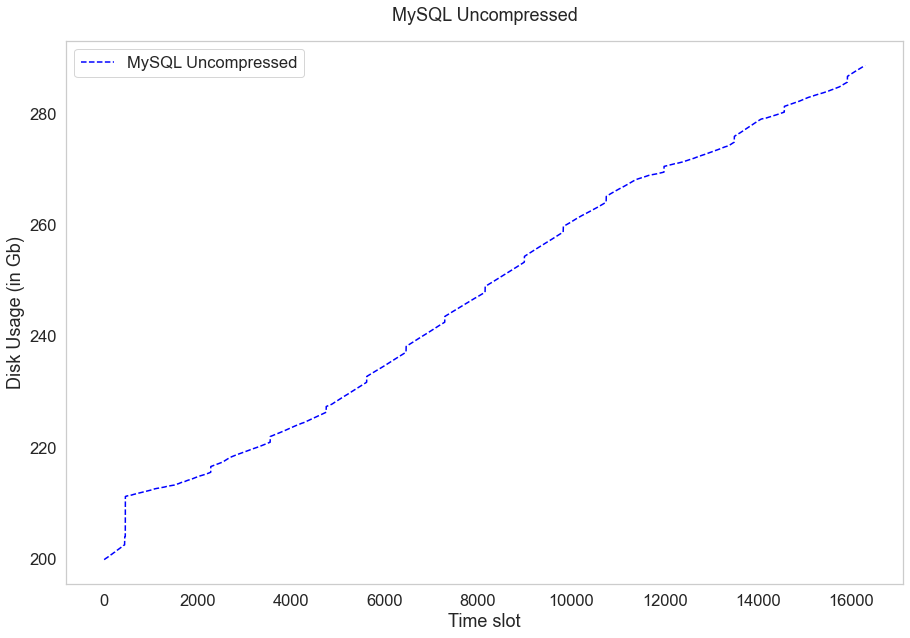

In [30]:
fig3 = plt.figure(figsize=(15, 10))
ax = fig3.add_subplot(1, 1, 1)
sns.set(font_scale = 1.5)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.lineplot(data=df_sql_uncompressed["Disk_Usage"]/1000, color = "blue", linestyle ="--", ax = ax)
ax.set(xlabel='Time slot', ylabel='Disk Usage (in Gb)')
plt.legend(["MySQL Uncompressed"], loc = "upper left")
plt.title("MySQL Uncompressed", pad =  20)
plt.savefig(r"C:\Users\ishri\Documents\Anumol\mysql.png", dpi = 300)
plt.savefig(r"C:\Users\ishri\Documents\Anumol\mysql.pdf", dpi = 300)

In [15]:
df_redis_uncompressed = pd.read_csv("redis_results_uncompressed.csv")
df_redis_compressed = pd.read_csv("redis_results_compressed.csv")
df_redis_compressed.head()

,Date_time,CPU,Memory_Bytes,Disk_Usage
0,1630124416,8.948939e+08,7647232,4
1,1630124417,9.098035e+08,7798784,4
2,1630124418,9.307513e+08,7782400,8
3,1630124419,9.809968e+08,7704576,12
4,1630124421,1.001064e+09,7897088,16


In [16]:
df_redis_compressed['ref_date'] = df_redis_uncompressed['Redis_Date_Time']
df_redis_uncompressed.head()

,Date_time,CPU,Memory_Bytes,Disk_Usage,Unnamed: 4,Redis_Date_Time
0,1629986341,3.000686e+10,8933376,4,NaN,0
1,1629986342,3.003107e+10,9121792,8,NaN,1
2,1629986343,3.006815e+10,9183232,16,NaN,2
3,1629986344,3.011995e+10,9293824,28,NaN,3
4,1629986345,3.017539e+10,9228288,36,NaN,4


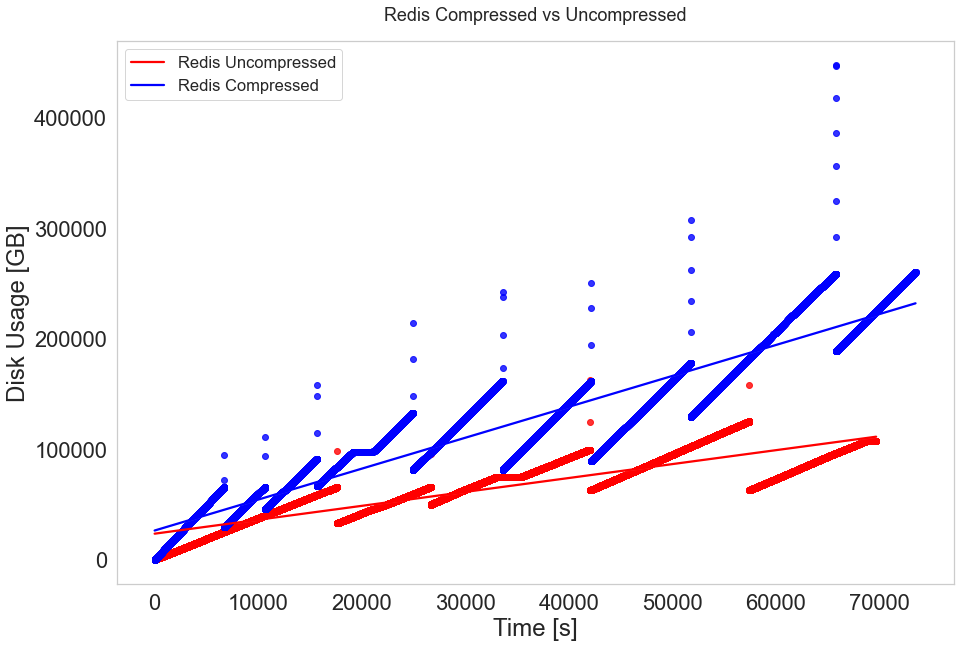

In [17]:
fig3 = plt.figure(figsize=(15, 10))
ax = fig3.add_subplot(1, 1, 1)
sns.set(font_scale = 1.5)
sns.set_style("whitegrid", {'axes.grid' : False})
ax = sns.regplot(x="ref_date", y="Disk_Usage", data=df_redis_compressed, color = "red")
ax = sns.regplot(x="Redis_Date_Time", y="Disk_Usage", data=df_redis_uncompressed, color = "blue")
#sns.lineplot(data=df_redis_uncompressed["Disk_Usage"], color = "blue", linestyle ="--", ax = ax)
#sns.lineplot(data=df_redis_compressed["Disk_Usage"], color = "red", linestyle ="--", ax = ax)
ax.set(xlabel='Time [s]', ylabel='Disk Usage [GB]')
plt.legend(["Redis Uncompressed", "Redis Compressed"], loc = "upper left")
plt.title("Redis Compressed vs Uncompressed", pad =  20)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\benchmarking_plots\redis.png", dpi = 300)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\benchmarking_plots\redis.pdf", dpi = 300)

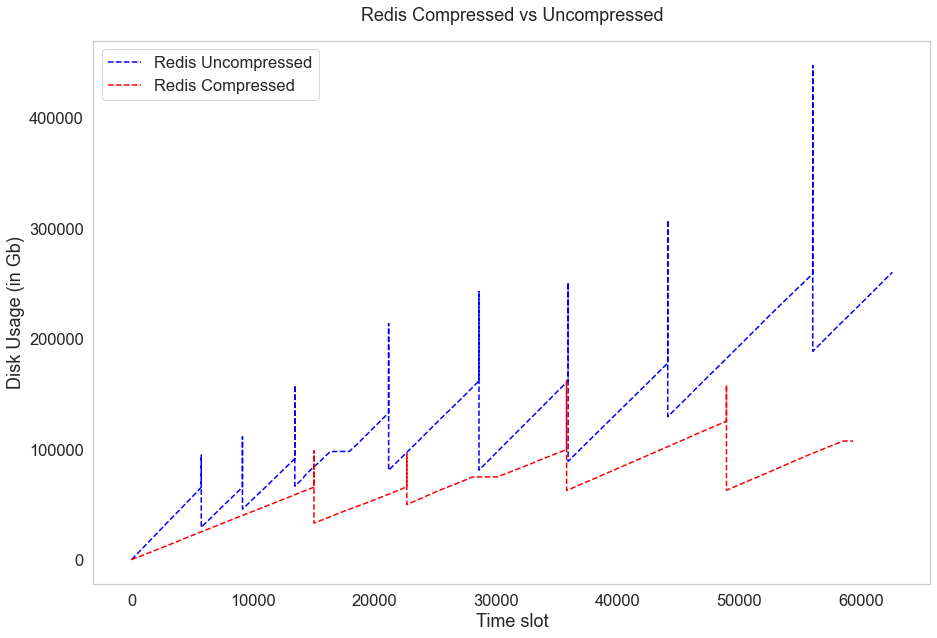

In [25]:
fig3 = plt.figure(figsize=(15, 10))
ax = fig3.add_subplot(1, 1, 1)
sns.set(font_scale = 1.5)
sns.set_style("whitegrid", {'axes.grid' : False})
# ax = sns.regplot(x="ref_date", y="Disk_Usage", data=df_redis_compressed, color = "red")
# ax = sns.regplot(x="Redis_Date_Time", y="Disk_Usage", data=df_redis_uncompressed, color = "blue")
sns.lineplot(data=df_redis_uncompressed["Disk_Usage"], color = "blue", linestyle ="--", ax = ax)
sns.lineplot(data=df_redis_compressed["Disk_Usage"], color = "red", linestyle ="--", ax = ax)
ax.set(xlabel='Time [s]', ylabel='Disk Usage [GB]')
plt.legend(["Redis Uncompressed", "Redis Compressed"], loc = "upper left")
plt.title("Redis Compressed vs Uncompressed", pad =  20)
plt.savefig(r"C:\Users\ishri\Documents\Anumol\redis_normal.png", dpi = 300)
plt.savefig(r"C:\Users\ishri\Documents\Anumol\redis_normal.pdf", dpi = 300)